In [1]:
# Task 1: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("D:\\Data Science\\assignments\\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Basic exploration

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (178, 14)

Columns:
 Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

Data types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [4]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851

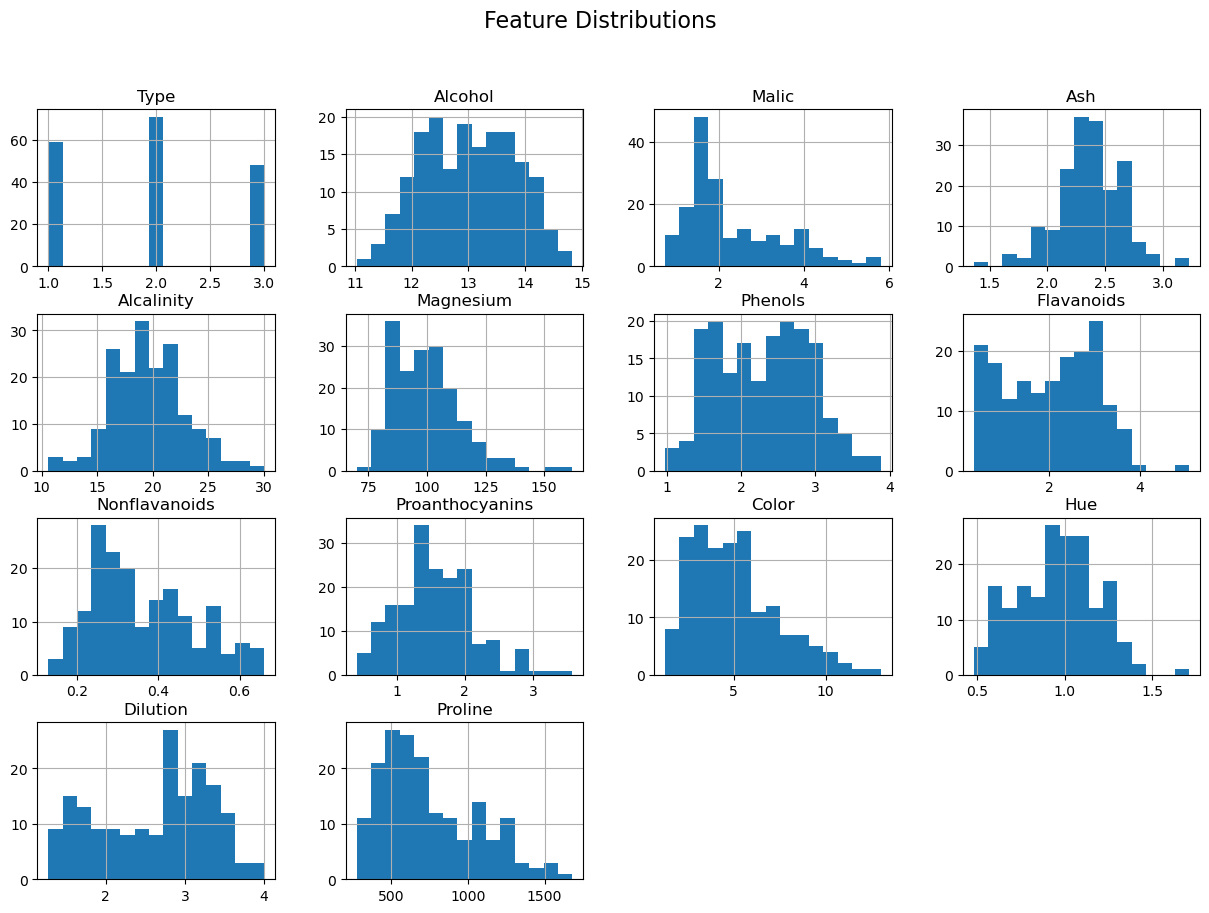

In [5]:
# Distribution plots for all numerical features
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

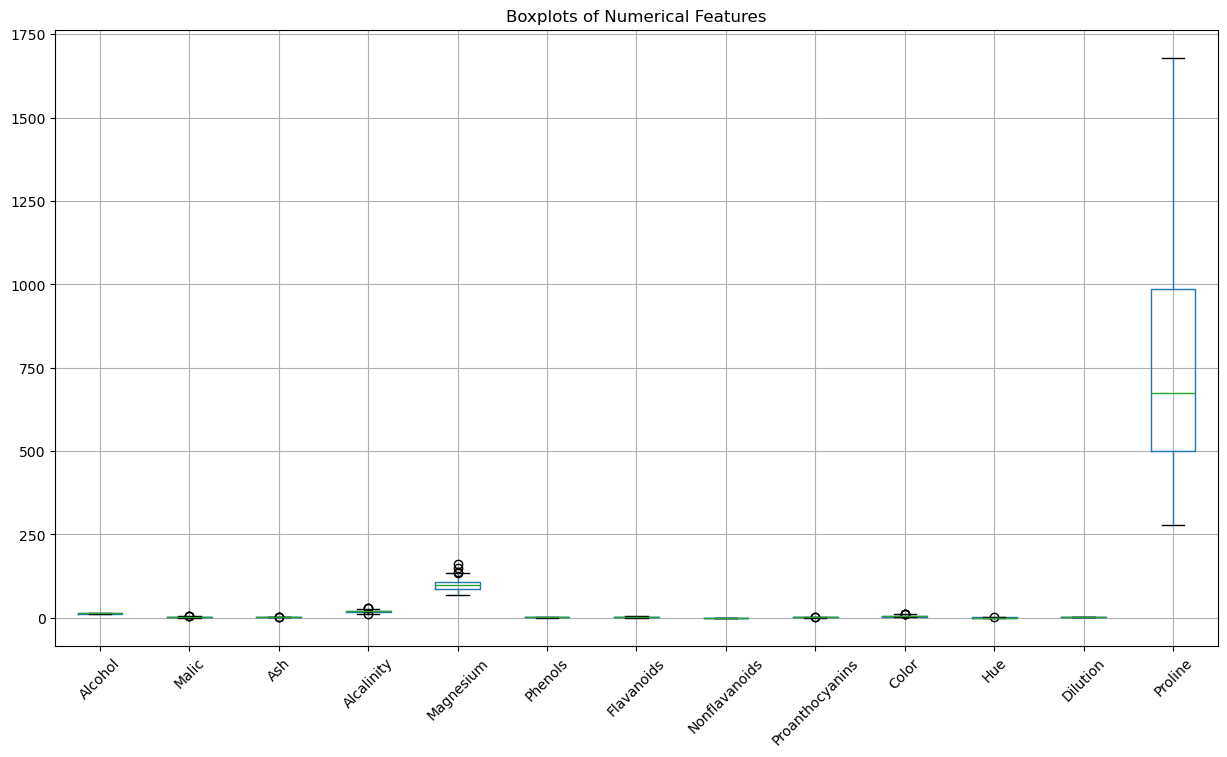

In [11]:
# Boxplots before standardization
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
df.drop("Type", axis=1).boxplot()
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

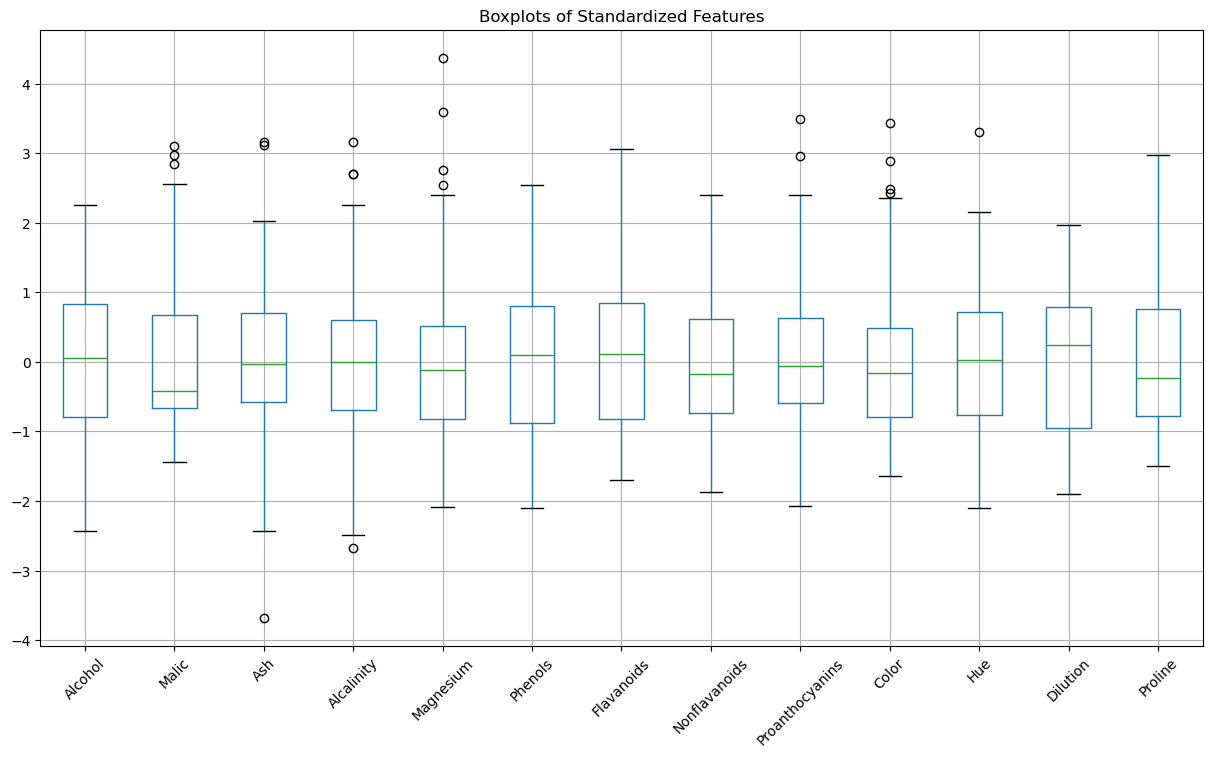

In [16]:
# Boxplots after standardization
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.drop("Type", axis=1)),
                         columns=df.drop("Type", axis=1).columns)

plt.figure(figsize=(15, 8))
scaled_df.boxplot()
plt.title("Boxplots of Standardized Features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
"""
Although a few mild outliers were observed after standardization, they were retained because they represent natural 
variation in wine samples rather than data errors.
"""

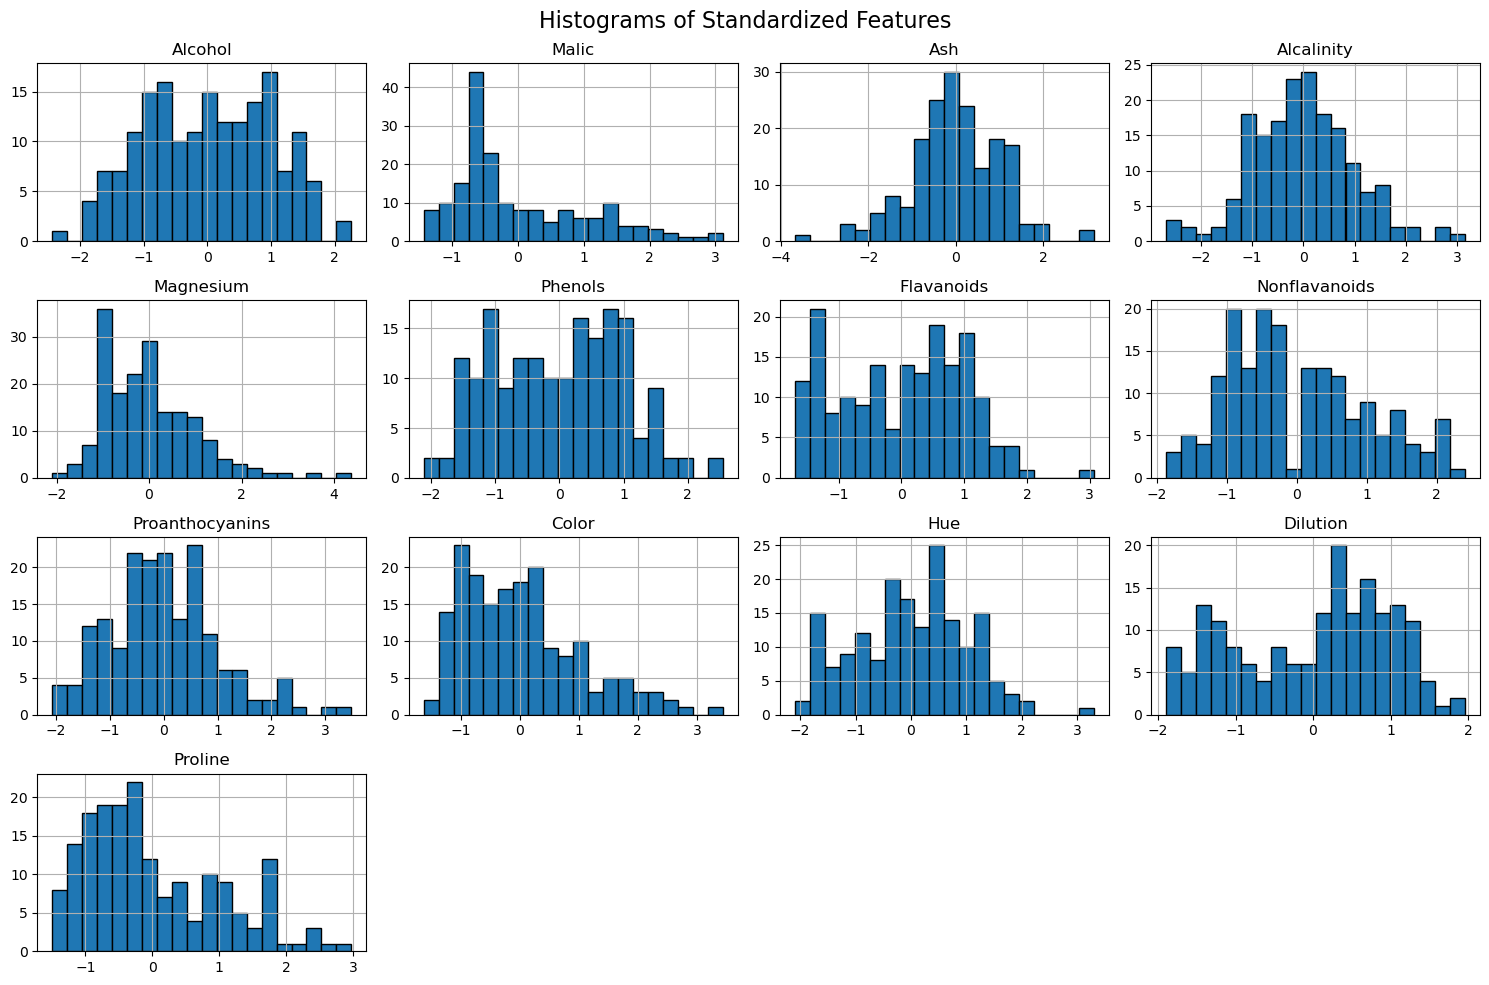

In [17]:
# Histograms for all standardized features 
scaled_df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Standardized Features", fontsize=16)
plt.tight_layout()
plt.show()

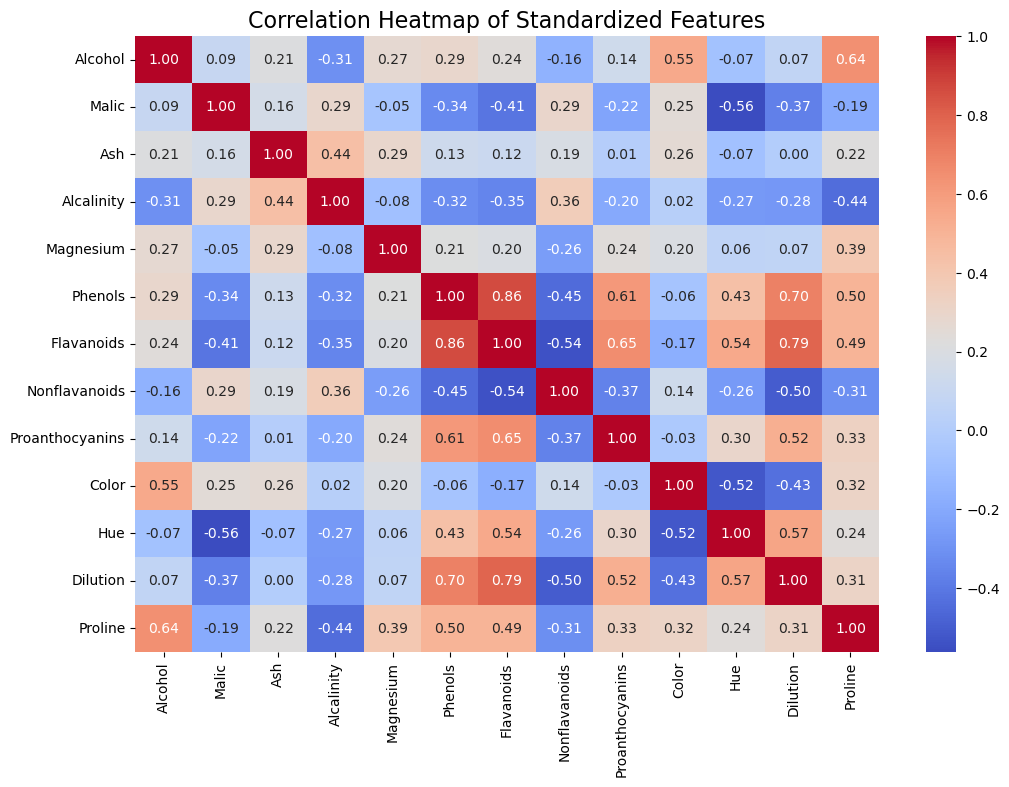

In [26]:
# Correlation Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Standardized Features", fontsize=16)
plt.show()

In [27]:
# Task 2: Dimensionality Reduction with PCA
# Standardized features
scaled_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


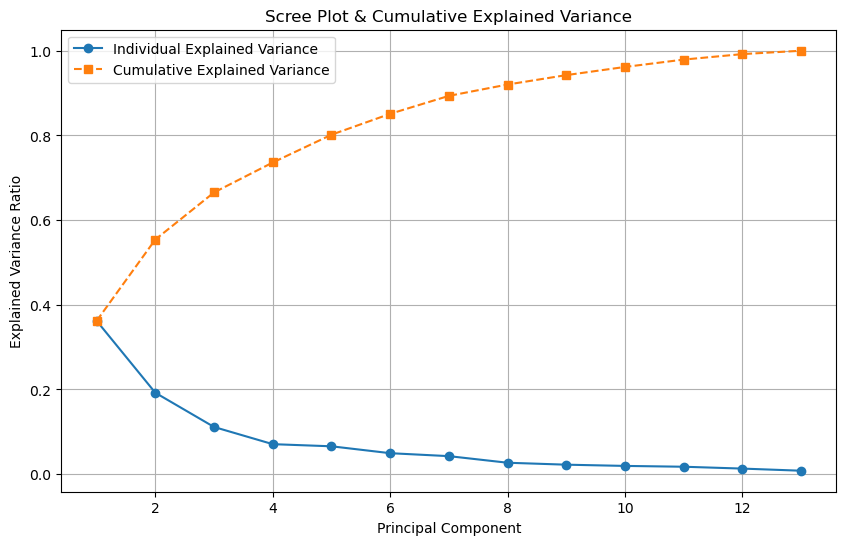

PC1: 0.362
PC2: 0.192
PC3: 0.111
PC4: 0.071
PC5: 0.066
PC6: 0.049
PC7: 0.042
PC8: 0.027
PC9: 0.022
PC10: 0.019
PC11: 0.017
PC12: 0.013
PC13: 0.008


In [28]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot and Cumulative Explained Variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 's--', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance for interpretation
for i, ev in enumerate(explained_variance, 1):
    print(f"PC{i}: {ev:.3f}")


In [31]:
from sklearn.decomposition import PCA

# Apply PCA with 7 components
pca_7 = PCA(n_components=7)
wine_pca_7 = pca_7.fit_transform(scaled_df)

# Convert to DataFrame for easier handling
wine_pca_7_df = pd.DataFrame(wine_pca_7, columns=[f'PC{i+1}' for i in range(7)])

# Display explained variance
print("Explained Variance Ratios (7 PCs):", pca_7.explained_variance_ratio_)
print("\nTotal Variance Explained:", pca_7.explained_variance_ratio_.sum())


Explained Variance Ratios (7 PCs): [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]

Total Variance Explained: 0.8933679539739373


In [ ]:
"""
Keeping around 5 principal components preserves about 80–85% of the information.
Keeping 7 components gives you around 90%, which is excellent for modeling.
"""

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

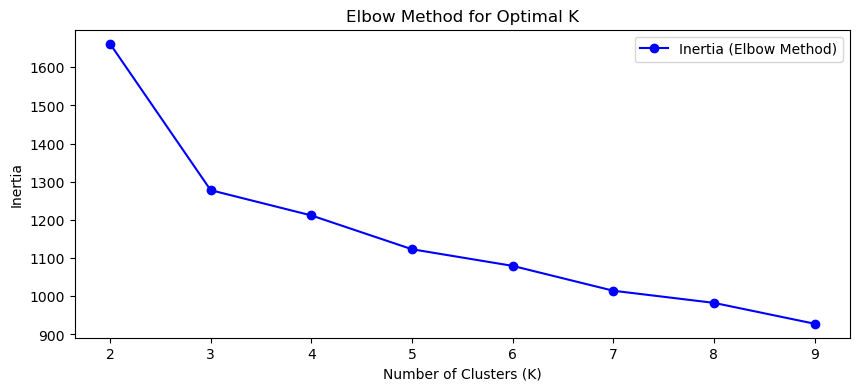

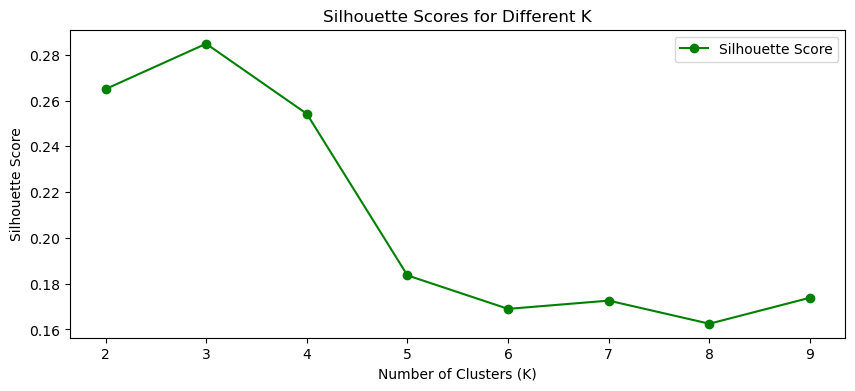

In [37]:
# Task 3: Clustering with Original Data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find optimal K
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10,4))
plt.plot(K_range, inertia, 'bo-', label='Inertia (Elbow Method)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,4))
plt.plot(K_range, silhouette_scores, 'go-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.legend()
plt.show()


In [38]:
# For the Wine dataset, the best K is 3 as per the elbow curve. So, we’ll fit K=3

# Fit KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
clustered_df = scaled_df.copy()
clustered_df['Cluster'] = kmeans_labels


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


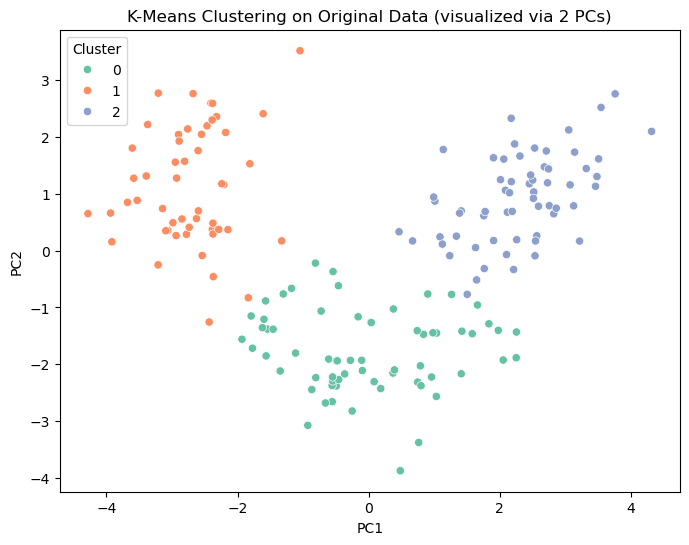

In [39]:
# Visualize Clustering Results (Using 2 PCA components for easy plotting)

import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
pca_2d = pca_vis.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering on Original Data (visualized via 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


In [40]:
from sklearn.metrics import davies_bouldin_score

silhouette = silhouette_score(scaled_df, kmeans_labels)
db_index = davies_bouldin_score(scaled_df, kmeans_labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.285
Davies–Bouldin Index: 1.389


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (PCA Data): 0.342
Davies–Bouldin Index (PCA Data): 1.183


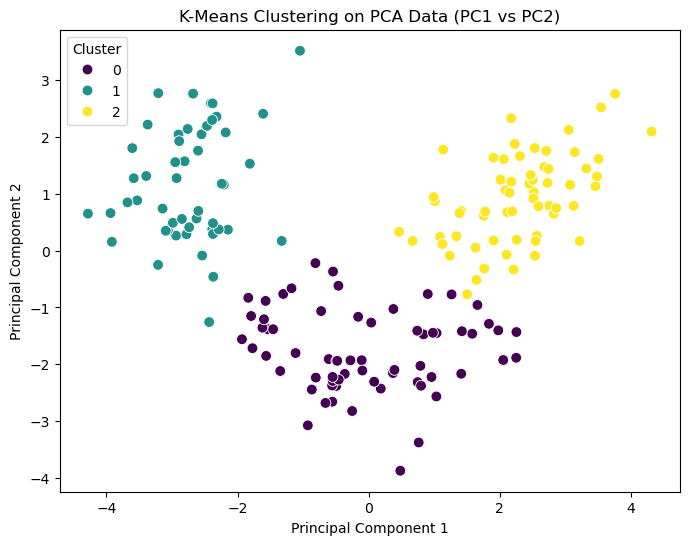

In [42]:
# Task 4: Clustering with PCA Data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: K-Means clustering on PCA-transformed data (7 PCs)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(wine_pca_7_df)

# Step 2: Add cluster labels
wine_pca_7_df['Cluster'] = kmeans_pca.labels_

# Step 3: Evaluate clustering performance
sil_score_pca = silhouette_score(wine_pca_7_df.iloc[:, :-1], kmeans_pca.labels_)
db_index_pca = davies_bouldin_score(wine_pca_7_df.iloc[:, :-1], kmeans_pca.labels_)

print(f"Silhouette Score (PCA Data): {sil_score_pca:.3f}")
print(f"Davies–Bouldin Index (PCA Data): {db_index_pca:.3f}")

# Step 4: Visualization (First 2 PCs)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=wine_pca_7_df['PC1'],
    y=wine_pca_7_df['PC2'],
    hue=wine_pca_7_df['Cluster'],
    palette='viridis',
    s=60
)
plt.title('K-Means Clustering on PCA Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
"""
"Comparing the clustering results"

(K-Means on PCA Data) Results:

Silhouette Score (PCA Data): 0.342
Davies–Bouldin Index (PCA Data): 1.183

(K-Means on Original Data) Results:

Silhouette Score (Original Data): 0.285
Davies–Bouldin Index (Original Data): 1.389

After applying PCA (dimensionality reduction to 7 PCs), the clustering performance significantly improved:

-> The clusters became tighter and more separated.

-> Noise and redundant features were reduced, helping K-Means form clearer, more distinct groups.

"""


In [ ]:
"""

# Task 5: Comparison and Analysis

1. The PCA-transformed data gave better clustering performance, showing clearer separation between 
   clusters and more compact groups.

2. Similarities and Differences:

Similarities:

-> Both approaches identified three major clusters, aligning with the three wine types in the dataset.

-> The overall structure of clusters remained consistent.

Differences:

-> Clusters from the PCA data are more well-separated and less overlapping.

-> Original data clustering suffered from noisy and correlated features, causing overlap between groups.

3. Impact of Dimensionality Reduction:

-> PCA removed redundant and correlated information, making the clustering task easier for K-Means.

-> Reduced dimensions (from 13 to 7 PCs) captured ~89.3% of total variance, retaining most of the useful information.

-> The performance metrics (Silhouette and DB Index ) confirm that PCA improved clustering quality.

4. Trade-offs Between PCA and Direct Clustering:

Using PCA:

Computation = Faster due to fewer dimensions
Interpretability = Harder — PCs are combinations of original features
Performance = Often better — removes noise and correlation
Best Use = When there are many correlated features

Using Original Data:

Computation = Slower with high-dimensional data
Interpretability  = Easier — features are directly interpretable
Performance = Sometimes worse — affected by redundancy
Best Use = When interpretability is crucial

"""

In [ ]:
"""

Task 6: Conclusion and Insights

1. Key Findings:

-> PCA reduced the dataset from 13 to 7 dimensions while preserving ~89% of the variance.

-> Clustering on PCA data achieved better-defined clusters with improved metrics.

-> Visualization confirmed clearer separation among the wine types after PCA.

2. Practical Implications:

-> Combining PCA + Clustering is highly effective in high-dimensional, correlated datasets (like chemical or gene data).

-> PCA simplifies data, removes noise, and improves performance of clustering algorithms such as K-Means.

-> However, PCA can reduce interpretability since PCs are linear combinations of original variables.

3️. Recommendations:

-> Use PCA before clustering:

When the dataset has many correlated features.

When we prioritize performance and clarity of clusters.

-> Use direct clustering on original data:

When we need feature-level insights (which original variables drive clustering).

-> A hybrid approach (PCA for visualization + clustering on selected features) can balance interpretability and 
   performance.

"""